Two Favorite Albums:
Luke Sidle
10/15/24
The source I am using is the Spotify API endpoint. I am structuring the data using plots to showcase the differences visually and leaving some tables to show where the data came from. I am also pulling from my two favorite albums VxV by Wolves at the Gate and I Didn't Mean To Haunt You by Quadeca. The first one, VxV, means a lot to me because it pulls upon my faith as a Christian and is Gospel in its rawest form. I Didn't Mean to Haunt You is my favorite concept album of all time and is a beautiful story about accepting death, feeling like a ghost, and loss.

Below I establish the plugins I am using. 

In [77]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

Gaining access to the API and establishing what I am pulling from it in the next 5 cells. 

In [78]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization':'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [79]:
keys = pd.read_csv(r"C:\Users\datgu\OneDrive\Documents\spotifykeys.txt")

In [80]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [81]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

In [82]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [83]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [84]:
watg_album_id = '25iSFYXaLB60M0wNpYe2ms'
quad_album_id = '3c0NHNo2Gn0X7uARad3hGv'

Beginning to format the albums into a dataframe so I can merge them and put them into a CSV.

In [85]:
ab_tracks_ep.format(watg_album_id)

'https://api.spotify.com/v1/albums/25iSFYXaLB60M0wNpYe2ms/tracks'

In [86]:
watg_album_response = api_call(ab_tracks_ep.format(watg_album_id), session_header)
quad_album_response = api_call(ab_tracks_ep.format(quad_album_id), session_header)

200
200


Beginning the creation of the DataFrames I will use to merge the data.

In [87]:
watg_album_df = pd.DataFrame(watg_album_response['items'])
quad_album_df = pd.DataFrame(quad_album_response['items'])

In [88]:
watg_track_ids = ','.join(watg_album_df['id'].to_list())
quad_track_ids = ','.join(quad_album_df['id'].to_list())

In [89]:
t_features_ep + '?ids={}'.format(watg_track_ids)

'https://api.spotify.com/v1/audio-features?ids=3HhsLALqyS3O9JXE5vj3xl,17yeitb3I9fSEpw1kG9LIE,5JCBb6sGxeB93wzaqTaPKM,36lQBngkQH3JLtnPFBzviZ,1zb354qk8lK6MzGEZawPXT,0xmEH5OAtUZJf83ozYRufY,60sc1UiFaltuJX2WktAnw9,4I6CeEuLSRBAUJFqB3PtwO,1uiJkS2bAunCK9vVSmZWWR,6rzNIrmIBwbq8wr8EH3xXy,2h2ZGHSy4YLSNdoMw96kVS,1FgK0mMs5VAzcKHV9s23rJ'

In [90]:
watg_track_features = api_call(t_features_ep + '?ids={}'.format(watg_track_ids), session_header)
quad_track_features = api_call(t_features_ep + '?ids={}'.format(quad_track_ids), session_header)

200
200


In [91]:
watg_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(watg_track_ids), session_header)
quad_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(quad_track_ids), session_header)

200
200


In [92]:
watg_features_df = pd.DataFrame(watg_track_features['audio_features'])
quad_features_df = pd.DataFrame(quad_track_features['audio_features'])

In [93]:
watg_tracks_df = pd.DataFrame(watg_track_info['tracks'])
quad_tracks_df = pd.DataFrame(quad_track_info['tracks'])

In [94]:
watg_merged = pd.merge(watg_features_df, watg_tracks_df, how = 'inner', on = 'id')
quad_merged = pd.merge(quad_features_df, quad_tracks_df, how = 'inner', on = 'id')

After I finish merging the albums into one data frame. I give them short names so that I can speed up the process.

In [116]:
watg_merged['artist'] = "Wolves at the Gate"
quad_merged['artist'] = "Quadeca"

In [117]:
artist_compare = pd.concat([watg_merged,quad_merged], axis = 0)

Here I put the merged data frame into a CSV so that I can access it in plots to showcase the data.

In [118]:
artist_compare.to_csv('file4.csv')

Giving the data short hand name.

In [123]:
ces = pd.read_csv('file4.csv')

Here I am checking how many songs are on each album so I can determine if the data would be weighted to heavily in one way.

In [125]:
ces.groupby('artist')['id'].count()

artist
Quadeca               11
Wolves at the Gate    12
Name: id, dtype: int64

Determing the shorthand I will use for ces ['artist'] in the next two cells so I can speed the process up. This also allows me to divide the data between the albums so I can have better looking plots.

In [129]:
ces[ces['artist'] == 'Quadeca']
ces[ces['artist'] == 'Wolves at the Gate']

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0,0.348,0.609,2,-16.927,1,0.0858,0.937000,0.000000,0.7380,...,https://api.spotify.com/v1/tracks/3HhsLALqyS3O...,False,True,Vxv,13,https://p.scdn.co/mp3-preview/8eb83356573c0d1e...,1,track,spotify:track:3HhsLALqyS3O9JXE5vj3xl,Wolves at the Gate
1,1,0.419,0.999,11,-3.393,0,0.2450,0.000597,0.000000,0.3350,...,https://api.spotify.com/v1/tracks/17yeitb3I9fS...,False,True,Wake Up,21,https://p.scdn.co/mp3-preview/ae728d1419907ded...,2,track,spotify:track:17yeitb3I9fSEpw1kG9LIE,Wolves at the Gate
2,2,0.453,0.998,2,-4.697,1,0.2760,0.000149,0.000000,0.0873,...,https://api.spotify.com/v1/tracks/5JCBb6sGxeB9...,False,True,Dust to Dust,21,https://p.scdn.co/mp3-preview/e0d6514ef5d25fed...,3,track,spotify:track:5JCBb6sGxeB93wzaqTaPKM,Wolves at the Gate
3,3,0.239,0.993,2,-3.873,0,0.3050,0.000289,0.000003,0.3350,...,https://api.spotify.com/v1/tracks/36lQBngkQH3J...,False,True,Return,17,https://p.scdn.co/mp3-preview/51cc1c5950d7d3f7...,4,track,spotify:track:36lQBngkQH3JLtnPFBzviZ,Wolves at the Gate
4,4,0.468,0.994,2,-2.977,0,0.1480,0.001290,0.000000,0.3630,...,https://api.spotify.com/v1/tracks/1zb354qk8lK6...,False,True,Relief,24,https://p.scdn.co/mp3-preview/d02f00aaef92dfd5...,5,track,spotify:track:1zb354qk8lK6MzGEZawPXT,Wolves at the Gate
5,5,0.436,0.975,9,-3.988,0,0.1990,0.003150,0.000002,0.3260,...,https://api.spotify.com/v1/tracks/0xmEH5OAtUZJ...,False,True,The Bird and the Snake,22,https://p.scdn.co/mp3-preview/99c777e6b81180bc...,6,track,spotify:track:0xmEH5OAtUZJf83ozYRufY,Wolves at the Gate
6,6,0.408,0.984,2,-3.899,0,0.0954,0.000148,0.000007,0.3110,...,https://api.spotify.com/v1/tracks/60sc1UiFaltu...,False,True,Rest,16,https://p.scdn.co/mp3-preview/71534c01df4c33c1...,7,track,spotify:track:60sc1UiFaltuJX2WktAnw9,Wolves at the Gate
7,7,0.276,0.945,2,-3.723,0,0.1330,0.000500,0.000001,0.1080,...,https://api.spotify.com/v1/tracks/4I6CeEuLSRBA...,False,True,East to West,23,https://p.scdn.co/mp3-preview/be92b3f5a634d521...,8,track,spotify:track:4I6CeEuLSRBAUJFqB3PtwO,Wolves at the Gate
8,8,0.505,0.994,11,-3.855,0,0.1620,0.000383,0.000000,0.0863,...,https://api.spotify.com/v1/tracks/1uiJkS2bAunC...,False,True,Wild Heart,16,https://p.scdn.co/mp3-preview/d31118e4bab7712d...,9,track,spotify:track:1uiJkS2bAunCK9vVSmZWWR,Wolves at the Gate
9,9,0.513,0.995,6,-3.021,1,0.1470,0.000112,0.000000,0.5120,...,https://api.spotify.com/v1/tracks/6rzNIrmIBwbq...,False,True,The Convicted,16,https://p.scdn.co/mp3-preview/488ee99e7843aa55...,10,track,spotify:track:6rzNIrmIBwbq8wr8EH3xXy,Wolves at the Gate


In [132]:
VxV = ces[ces['artist'] == 'Wolves at the Gate']
IDMTHY = ces[ces['artist'] == 'Quadeca']

Building the first figure for histograms. I am choosing energy and valence because I think they are the most unique factors between the two albums. VxV is a metal album that is built in passion and electricity. I Didn't Mean To Haunt You is slow, experimental, and sadder. 

In the data below we see that the energy for VxV is extremely higher than the energy in IDMTHY as I predicted. The valence is closer in the graphs, but I think that this is not accurate. Spotify is probably more prone to thinking metal is negative due to its scales, keys, and other factors. However, looking at the lyrics the valence would change. 

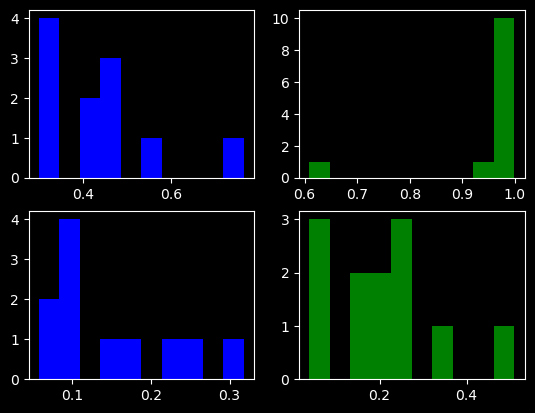

In [162]:
fig1, ax1 = plt.subplots(2,2)
plt.style.use('dark_background')
ax1[0,1].hist(VxV['energy'], color = 'green')
ax1[0,0].hist(IDMTHY['energy'], color = 'blue')
ax1[1,1].hist(VxV['valence'], color = 'green')
ax1[1,0].hist(IDMTHY['valence'], color = 'blue')
plt.show()

Here I use a scatter plot to compare the energy and valence of each album to itself.

I tried to get the label to work, but I could not get it to function.

What the plots are showing us is that in VxV the energy is much higher than the valence except for one outlier. The energy in IDMTHY is lower compared to the valence, which I think correlates since it is a sadder and slower album. Therefore Valence would be higher. 

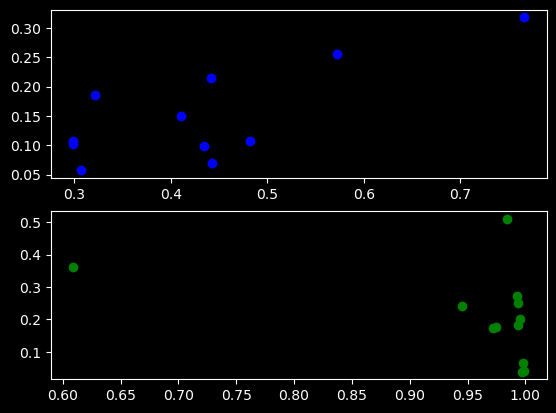

In [165]:
fig2, ax2 = plt.subplots(2)
plt.style.use('dark_background')
ax2[1].scatter(VxV['energy'], VxV['valence'], color = 'green', label="VxV")
ax2[0].scatter(IDMTHY['energy'], IDMTHY['valence'], color = 'blue', label="IDMTHY")
plt.show()

Here I create one scatter plot of the two scatter plots above combined. I also add labels so it is easier to understand which data is which. This allows for a more complex and detailed comparison. The two albums do not intersect in their data much on the x-axis. Two outliers cross the x barrier between the data, but that is just one point. The conclusion I can draw from this data would be that these albums are very different in the emotions that they portray. Also, they are different in how they portray their emotions. VxV uses high energy to accent its messages, while conversely, IDMTHY uses slower and more relaxed tones to show its strong story and message. 

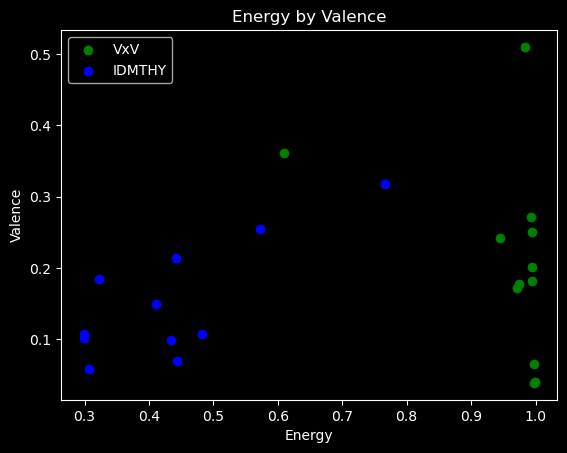

In [146]:
fig3, ax3 = plt.subplots(1)
plt.style.use('dark_background')
ax3.scatter(VxV['energy'], VxV['valence'], color = 'Green', label="VxV")
ax3.scatter(IDMTHY['energy'], IDMTHY['valence'], color = 'Blue', label="IDMTHY")
ax3.set_title("Energy by Valence")
ax3.set_xlabel("Energy")
ax3.set_ylabel("Valence")
ax3.legend()
plt.show()

I create a boxplot based on the energy of either game. The first one is the VxV energy and the second one is the IDMTHY energy. I chose energy because it is the most divided of the two variables I picked. VxV has extremely high energy compared to IDMTHY with only two outliers crossing the invisible barriers between the data. I believe the one track that crosses the barrier for VxV is not even a song but an audio that plays to begin the album. The IDMTHY track that crosses is the barrier is "knots" which makes sense since it is very similar to something you would here off of a Death Grips album. 

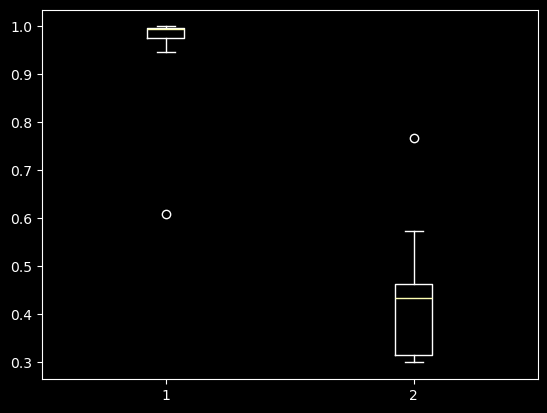

In [156]:
VxV_Energy = VxV['energy']
IDMTHY_Energy = IDMTHY['energy']

fig4, ax4 = plt.subplots()
plt.style.use('dark_background')
ax4.boxplot([VxV_Energy, IDMTHY_Energy])

plt.show()

For the ols() I honestly do not understand it (probably because I was not at the class we went over it). I believe I did it right, but making the energy a continuous 'y' variable and comparing it to energy. I made a scatterplot out of the regression results to try and visually understand it, but I am still confused. I thought it would be best to be honest instead of putting up a fake understanding. 

In [158]:
fit1 = smf.ols('energy ~ valence', data = ces).fit()

In [159]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.617
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.217
Time:                        15:35:12   Log-Likelihood:                -3.0089
No. Observations:                  23   AIC:                             10.02
Df Residuals:                      21   BIC:                             12.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5818      0.115      5.079      0.000       0.344       0.820
valence        0.6824      0.537      1.272      0.217      -0.434       1.799
==============================================================================
Omnibus:                       17.300   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.619
Skew:                           0.059   Prob(JB):                        0.270
Kurtosis:                       1.351   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

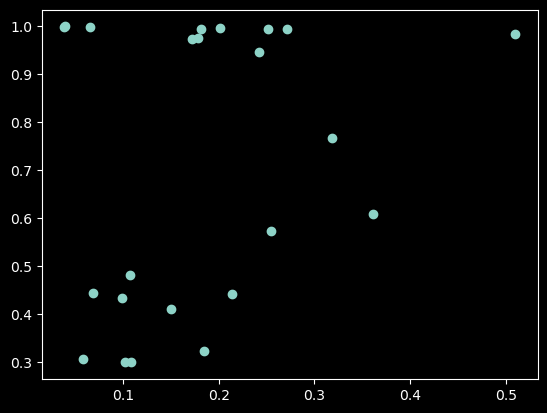

In [161]:
fig5, ax5 = plt.subplots()
ax5.scatter(ces['valence'], ces['energy'])
plt.show()

In conclusion, the energy of VxV is much higher than the energy of IDMTHY. This is due to it being a metal album with louder mixing, faster tempos, and dirty vocals. IDMTHY is a sadder album with slower tempos and lower energy overall. The valence, through data, is more comparable. They tend to cross the same line and be in the same area on the y-axis, but the energy divides them on the x-axis. 

I think the data does not fully show the correct valence for VxV and that is a limitation of the API. The lyrics of VxV are much more positive compared to the sound of the album. If the album is only reading the audio data and not the lyrics then that would make sense that it draws this conclusion. I think the alternative approach would be designing an API that tracks the lyricism. For me specifically, I could analyze the lyrics personally and define the positivity of the lyrics in VxV compared to IDMTHY. I am honestly not sure how I would do this, but I after a quick search I found some lyric analyzer APIs that I could add to a future project. 